### Exploratory Data Analysis

**Exploratory Data Analysis(EDA):** 
Preliminary step in data analysis to:
. Summarize main characteristics of the data
. Gain better undertsandng of the data set
. Uncover relationships between variables
. Extract important variables
It is basically the data cleaning process before analysis is done

**Descriptive Statistics:** 
. Desribe basic features of data set
. Giving short summaries about the sample and measures of the data.

Methods of doing this
1. Summarize statistics using pandas describe() method
2. Summarize the categorical data bsing the value_counts() method.
3. Usng Box plots
  
  Features of the Box plot
  
. upper Extreme - 1.5 * the inter-Quartile range above the 75th percentile

. Upper Quartile - Shows the 75th percentile is

. Median - Shows where the Middle data point is

. Lower Quartile - Shows the 25th percentile is

. Inter-Quartile range - Data between the upper and lower quartile

. Whisker -  The lines outside the box, that go from the minimum to the lower quartile and then from the upper quartile to the maximum.

. Lower Extreme - 1.5 * the inter-Quartile range below the 25th percentile 

. Outlier/single data point - Points outside the upper and lower extremes

4. Using Scatter plot: This shows the relationship between two variables.

. Predictor/independent variables on x-axis (horizontal axis)

. Target/dependent variables on y-axis (vertical axis)

**GroupBy data**

Grouping data.

- Using Panda dataframe.Groupby() method:
. Can be applied on categorical variables.
. Group data into categories.
. Single or multiple variables

- Using the Pandas method - Pivot(): One variable displayed along the columns and the other displayed along the rows.

- Using Heatmap: Plot target variable over multiple variables.

**Correlation**

A statistical metric for measuring to what extent different variables are interdependent i.e how the change in one variable affects the other variable.
It doesnt imply causation.

Positive Linear Correlation: Increase in one variable causes an increase in the other variable.

Negative Linear Correlation: Increase in one variable causes a decrease in the other variable.

Correlation Statistics:
To measure the strength of the correlation between two features.
Pearson correlation method: gives two values - the correlation coefficient and the p-value

Correlation coefficient:
    Close to +1 - Large positive relationship
    Close to -1 - Large negative relationship
    Close to 0 - No relationship

P-value:
    P-value < 0.001 - Strong certainty in the result
    P-value < 0.05 - Moderate certainty in the result
    P-value < 0.1 - Weak certainty in the result
    P-value > 0.001 - No certainty in the result

Strong correlation:
    . Correlation coefficient close to 1 or -1
    . P-value less than 0.001
    
**Analysis of Variance (ANOVA)**
This measures the statistical comparison of groups.
Why ANOVA? - It is used to find the correlation between different groups of a categorical variable.
What to obtain from ANOVA:
To see the difference in mean price. The test returns 2 values:
1. The F-test score: Calculates the variation between sample group means divided by variation within sample group.
    Small F - imply poor correlation between variable categories and target variable.
    Large F - imply strong correlation between variable categories and target variable.    
2. P-value: Confidence degree(statistically significant)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# !head_data/sales_data.csv

In [3]:
sales = pd.read_csv('C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\sales_data.csv', parse_dates = ['Date'])

In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
sales.shape

(113036, 18)

In [6]:
# to understand the properties of the data
sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
# to know the statistical properties of the data
sales.describe() 

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


**Numerical analysis and visualization**

In [8]:
# to access the unit cost column
sales['Unit_Cost']

0         45
1         45
2         45
3         45
4         45
          ..
113031    24
113032    24
113033    24
113034    24
113035    24
Name: Unit_Cost, Length: 113036, dtype: int64

In [9]:
# to access the unit cost column
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [10]:
sales['Unit_Cost'].mean()

267.296365759581

In [11]:
sales['Unit_Cost'].median()

9.0

<AxesSubplot:>

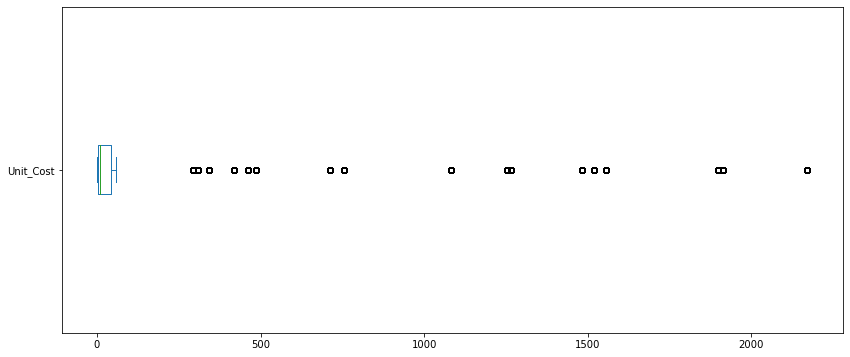

In [12]:
# to visualize the unit cost data using the box plot
sales['Unit_Cost'].plot(kind = 'box', vert = False, figsize = (14, 6))

<AxesSubplot:ylabel='Density'>

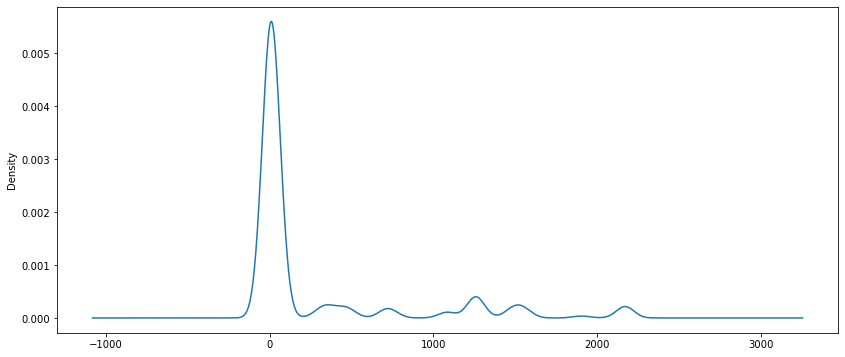

In [13]:
# to visualize the unit cost data using the density plot
# Density plots are used to observe the distribution of a variable in a dataset.
sales['Unit_Cost'].plot(kind = 'density', figsize = (14, 6)) # kde

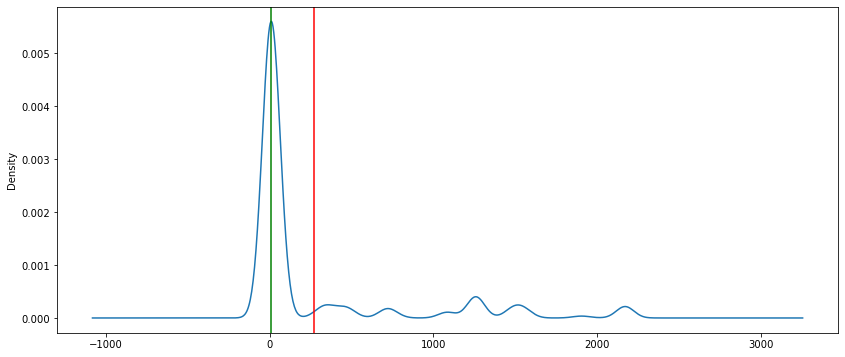

In [14]:
# to point out the mean and the median in the distribution chart
ax = sales['Unit_Cost'].plot(kind = 'density', figsize = (14, 6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color = 'red')
ax.axvline(sales['Unit_Cost'].median(), color = 'green')

Text(0.5, 0, 'dollars')

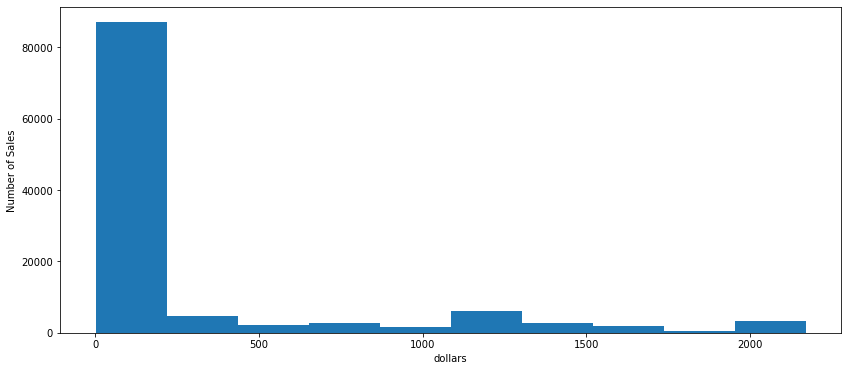

In [15]:
# plotting the histogram of the cost of our product
ax = sales['Unit_Cost'].plot(kind = 'hist', figsize = (14, 6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

**Categorical analysis and visualization**

In [16]:
# We'll analyse the Age_Group of our customers in the Age Group column
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [17]:
sales['Age_Group'].value_counts() # the age groups are categorized into 4 as seen below

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

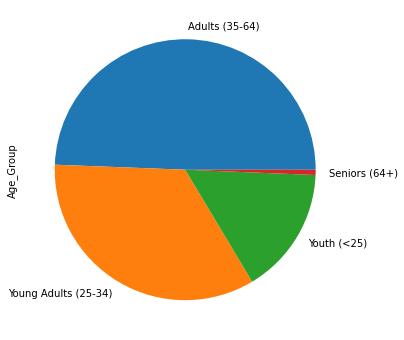

In [18]:
# Plotting the pie chart of the age groups
sales['Age_Group'].value_counts().plot(kind = 'pie', figsize = [6, 6]) 

Text(0, 0.5, 'Number of Sales')

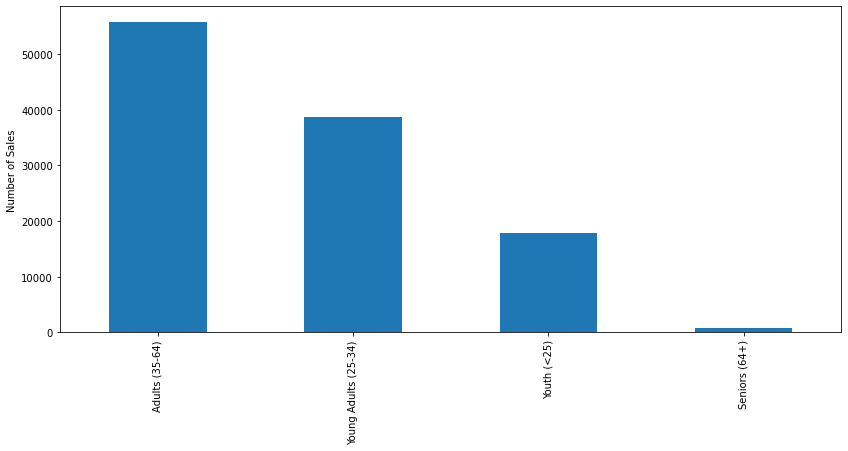

In [19]:
# Plotting the bar chart of the age groups
ax = sales['Age_Group'].value_counts().plot(kind = 'bar', figsize = [14, 6])
ax.set_ylabel('Number of Sales')

**Relationship between the columns?**

Can we find any signicant relationship?

In [20]:
# to analyze the correlation of some of our properties
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


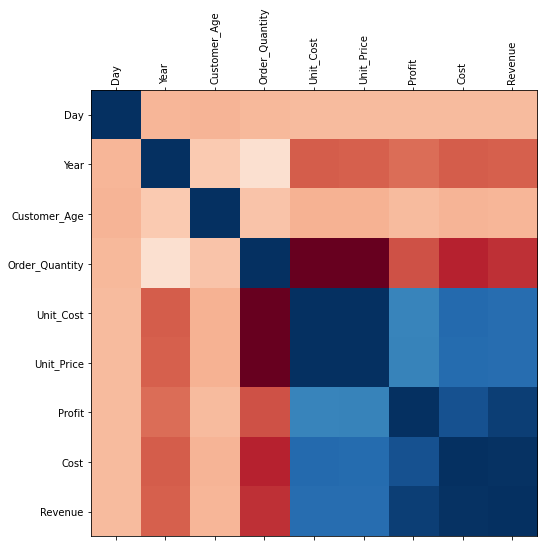

In [21]:
# To access the matrix of our correlation. 
fig = plt.figure(figsize = (8,8))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)), corr.columns); 
# Profit has a high positive correlation with unit cost & price (blue) and negative correlation with quantity (dark red)
# The lighter the colors, the lower the correlation. The darker the colors, the stronger the correlation

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

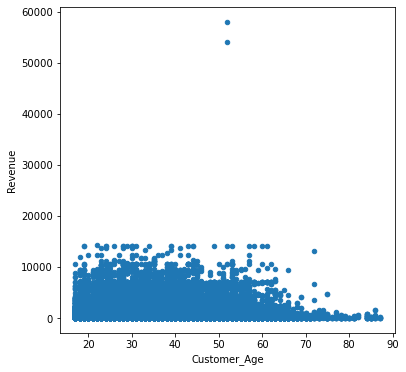

In [22]:
# using a scatter plot to analyse customer age and revenue.
sales.plot(kind = 'scatter', x = 'Customer_Age', y = 'Revenue', figsize = (6, 6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

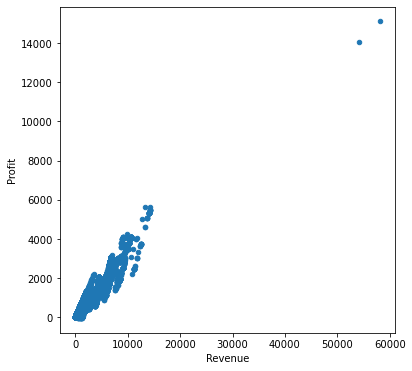

In [23]:
# using a scatter plot to analyse revenue and profit. 
sales.plot(kind = 'scatter', x = 'Revenue', y = 'Profit', figsize = (6, 6))
# there is a linear correlation between them

Text(0, 0.5, 'Profit')

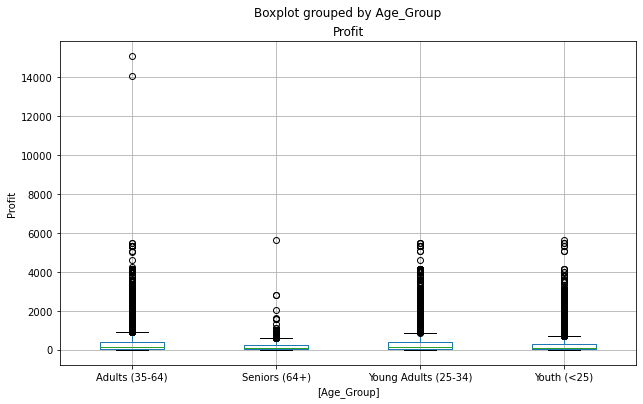

In [24]:
# using a scatter box plot to analyse the profit per age group.
ax = sales[['Profit', 'Age_Group']].boxplot(by = 'Age_Group', figsize = (10, 6))
ax.set_ylabel('Profit')
# profit changes depending on customer's age

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

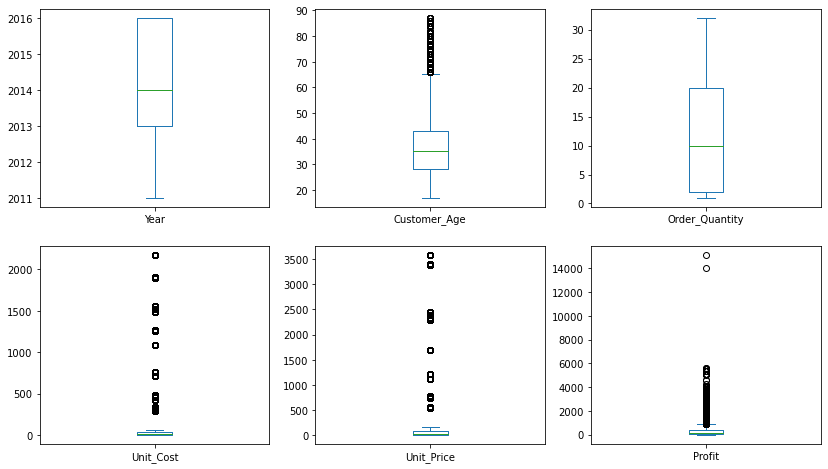

In [25]:
# using boxplots to grade the year, customer age, unit cost, unit price etc for multiple things 
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind = 'box', subplots = True, layout = (2, 3), figsize = (14, 8))

**Column wrangling**

We can also create new columns or modify existing ones

**Add and calculate a new Revenue_per_Age column**

In [26]:
# reshaping our data in the revenue per age column. 
sales['Revenue_per_Age'] = sales['Revenue']/sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

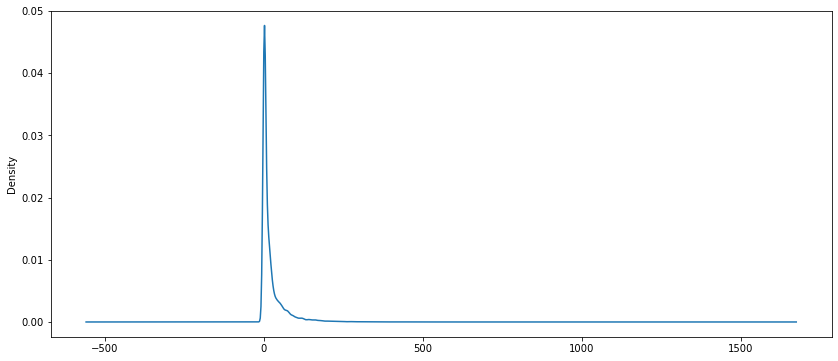

In [27]:
# plotting th density plot.
sales['Revenue_per_Age'].plot(kind = 'density', figsize = (14, 6))

<AxesSubplot:ylabel='Frequency'>

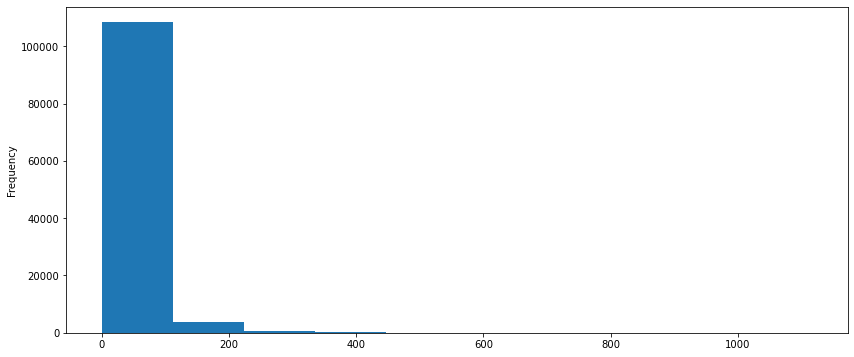

In [28]:
# plotting the histogram.
sales['Revenue_per_Age'].plot(kind = 'hist', figsize = (14, 6))

**Add and calculate a new Calculated_cost column**

In [29]:
# to get the calculated cost (Qty * cost)
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [30]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

We can see the relationship between Cost and Profit using a scatter plot

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

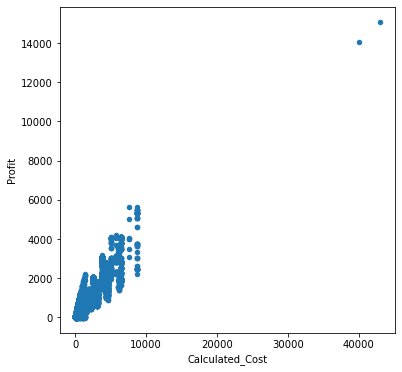

In [31]:
sales.plot(kind = 'scatter', x = 'Calculated_Cost', y = 'Profit', figsize = (6, 6))

**Add and calculate a new Calculated_Revenue column**

In [32]:
# getting the calculated revenue (cost + profit)
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']
sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [33]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [34]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<AxesSubplot:ylabel='Frequency'>

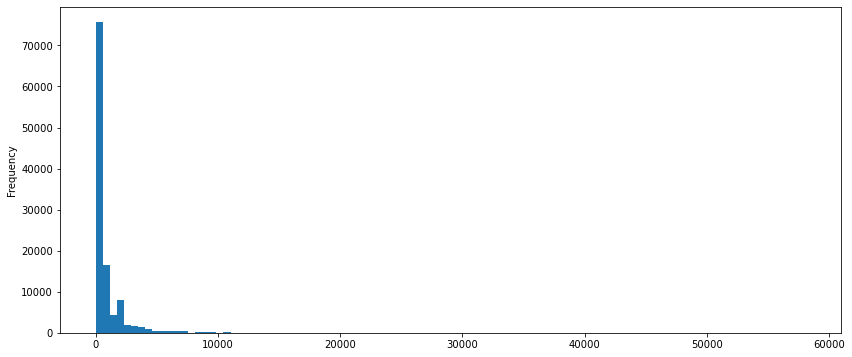

In [35]:
# plotting the histogram of the revenue
sales['Revenue'].plot(kind = 'hist', bins = 100, figsize = (14, 6))

Modify all Unit_Price values adding 3% tax to them

In [36]:
# addind 3% to all the prices 
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [37]:
# sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03 # *= Multiply AND Assign. It multiplies right operand with the left operand and assign the result to left operand

In [38]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

**Selection and Indexing:**

Get all the sales made in the state of Kentucky

In [39]:
# getting all the sales from the state of Kentucky
sales.loc[sales['State'] =='Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


**Get the mean revenue of the Adults (35 - 64) sales group**

In [40]:
# Getting the average sales by the Adult Age group and Revenue
sales.loc[sales['Age_Group'] =='Adults (35-64)', 'Revenue'].mean()

762.8287654055604

**How many records belong to Age Group Youth(<25) or Adults (35-64)?**

In [41]:
sales.loc[(sales['Age_Group'] =='Youth (<25)') | (sales['Age_Group'] == 'Adults (35 - 64)')].shape[0]

17828

**Get the mean revenue of the sales group Adults (35-64) in United States**

In [42]:
# Getting all the sales from the Adults Age Group in the United States
sales.loc[(sales['Age_Group'] =='Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

**Increase the revenue by 10% to every sale made in France**

In [43]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [44]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [45]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

### The Sakila Database ###

In [46]:
# Importing the packages for displaying images
from PIL import Image
import numpy as np
from IPython.display import display

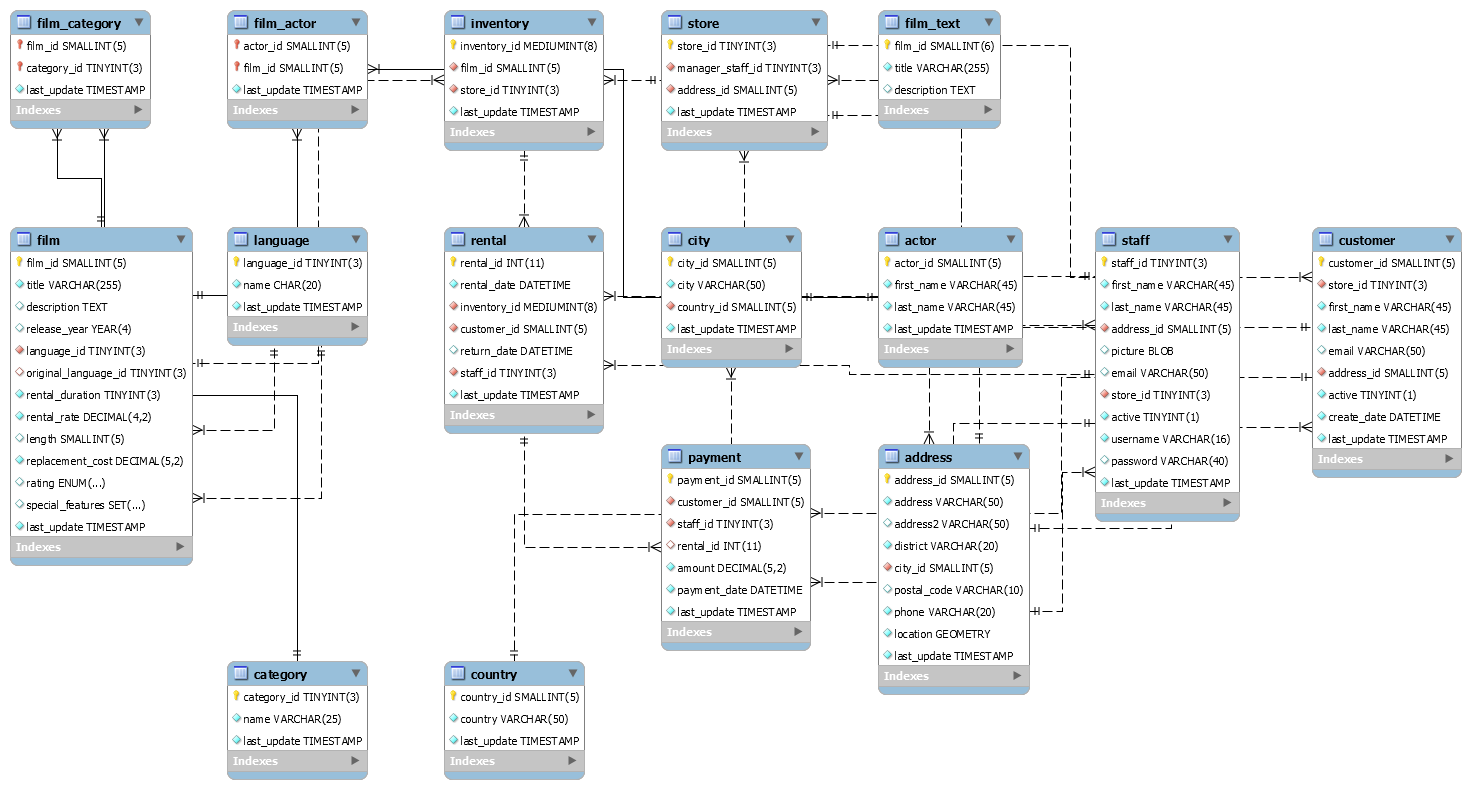

In [47]:
im = Image.open('C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\skl.png')
display(im)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

#### Loading our Data ####

In [49]:
conn = sqlite3.connect('C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\sakila.db')

In [50]:
df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration As film_rental_duration,
        film.rental_rate As film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
    ''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])


In [51]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [52]:
df.shape

(16044, 10)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [54]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


**Numerical analysis and visualization**

In [55]:
# We will analyze the film_rental_rate column
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [56]:
# Analyzing the mean
df['film_rental_rate'].mean()

2.9426302667662574

In [57]:
# Analyzing the median
df['film_rental_rate'].median()

2.99

<AxesSubplot:>

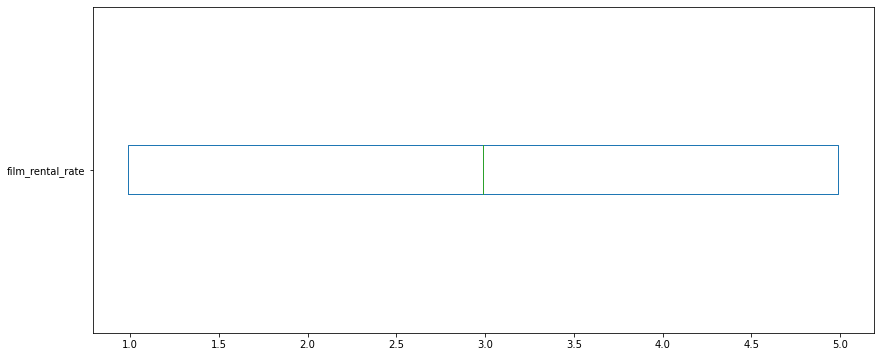

In [58]:
df['film_rental_rate'].plot(kind = 'box', vert = False, figsize = (14, 6))

<AxesSubplot:ylabel='Density'>

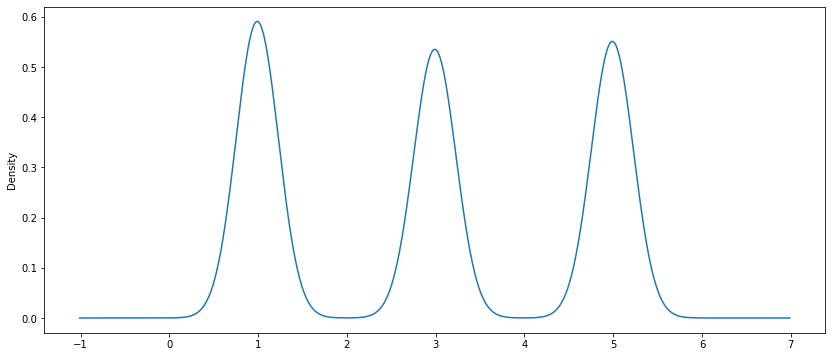

In [59]:
# This shows the distribution of the data
df['film_rental_rate'].plot(kind = 'density', figsize = (14, 6)) # kde

Text(0, 0.5, 'Number of Rentals')

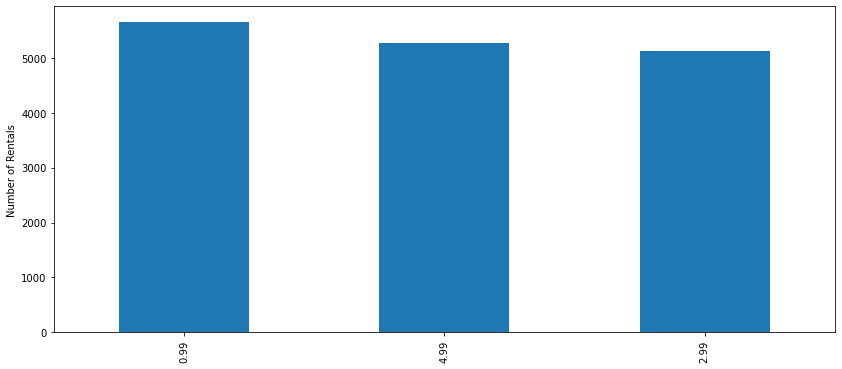

In [60]:
ax = df['film_rental_rate'].value_counts().plot(kind = 'bar', figsize = (14, 6))
ax.set_ylabel('Number of Rentals')

**Categorical analysis and visualiation**

In [61]:
# We'll analyze the rental_store_city column.
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

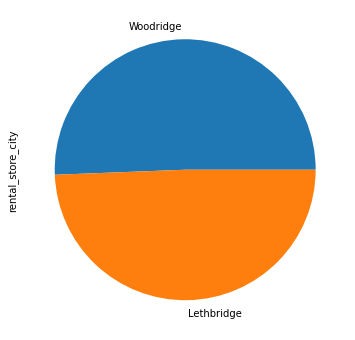

In [62]:
df['rental_store_city'].value_counts().plot(kind = 'pie', figsize = (6, 6));
# use a semicolon at the end to supress the write up 

Text(0, 0.5, 'Number of Rentals')

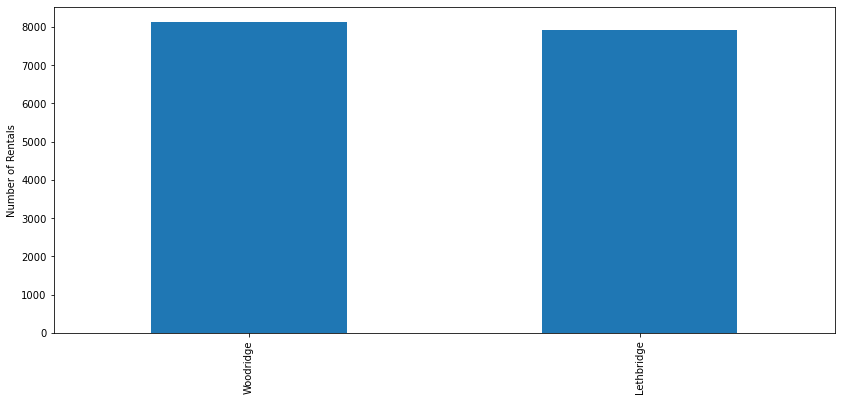

In [63]:
ax = df['rental_store_city'].value_counts().plot(kind = 'bar', figsize = (14, 6))
ax.set_ylabel('Number of Rentals')

**Column wrangling**

We can also create new columns or modify existing ones.

Add and calculate a new rental_rate_return column

In [64]:
# We want to know the rental rate of return of each film. To do that we'll use this formula: rental_gain_return =film_rental_rate/film_replacement_cost * 100
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100
df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

<AxesSubplot:ylabel='Density'>

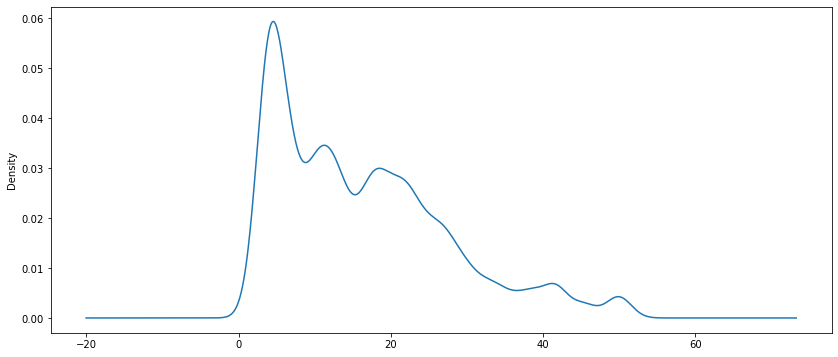

In [65]:
# plot the density chart
df['rental_gain_return'].plot(kind = 'density', figsize = (14, 6))

In [66]:
round(df['rental_gain_return'].mean(), 2)

16.34

In [67]:
round(df['rental_gain_return'].median(), 2)

13.6

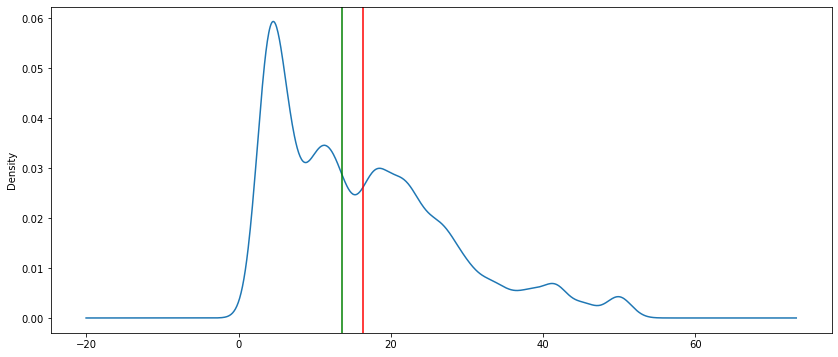

In [68]:
ax = df['rental_gain_return'].plot(kind = 'density', figsize = (14, 6)) # kde
ax.axvline(df['rental_gain_return'].mean(), color = 'red')
ax.axvline(df['rental_gain_return'].median(), color = 'green')

In [69]:
# Each rental represents 13.6 % of film cost.
# So, 7.35 rentals are needed to recover film market price(film_replacement_cost)

In [70]:
100 / 13.6

7.352941176470589

In [71]:
df['film_title'].value_counts().mean()

16.747390396659707

**Selection and Indexing:**

Get the rental records of the customer with last name HANSEN

In [72]:
df.loc[df['customer_lastname'] == 'HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


In [73]:
df.loc[df['customer_lastname'] == 'HANSEN'].shape

(21, 11)

Create a list of all the films with the highest replacement cost

In [74]:
df['film_replacement_cost'].max()

29.99

In [75]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

**How many PG or PG-13 rating films were rented?**

In [76]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')]
# the sign | is called pipe character or operator. It performs an or operation

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13,7.621247
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13,49.949950
11,2005-05-25 00:09:02,2005-06-02 20:56:02,BURNS,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
12,2005-05-25 00:19:27,2005-05-30 05:44:27,BYRD,1,Lethbridge,GAMES BOWFINGER,7,4.99,17.99,PG-13,27.737632
15,2005-05-25 00:39:22,2005-06-03 03:30:22,WEINER,1,Lethbridge,PELICAN COMFORTS,4,4.99,17.99,PG,27.737632
...,...,...,...,...,...,...,...,...,...,...,...
16038,2005-08-23 22:14:31,2005-08-30 03:28:31,WILLIS,1,Lethbridge,MICROCOSMOS PARADISE,6,2.99,22.99,PG-13,13.005655
16042,2005-08-23 22:20:40,2005-08-24 17:54:40,HICKS,2,Woodridge,CHARADE DUFFEL,3,2.99,21.99,PG,13.597090
16044,2005-08-23 22:24:39,2005-08-25 04:08:39,CARY,1,Lethbridge,EVERYONE CRAFT,4,0.99,29.99,PG,3.301100


In [77]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797

### Exploratory Data Analysis (EDA) Using Python ###

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns

In [82]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\StudentsPerformance.csv')

In [ ]:
# Step 1 - understanding the data

In [83]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [85]:
data.shape

(1000, 8)

In [86]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [87]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [88]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [89]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [90]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [91]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [92]:
# Step 2 - Cleaning the data

In [93]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [94]:
student = data.drop(['race/ethnicity', 'parental level of education'], axis = 1)

In [95]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [96]:
# Step 3 - Relationship analysis

In [97]:
correlation = student.corr()

<AxesSubplot:>

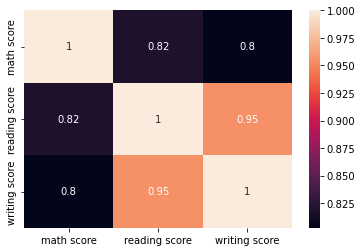

In [101]:
# plot the heatmap
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

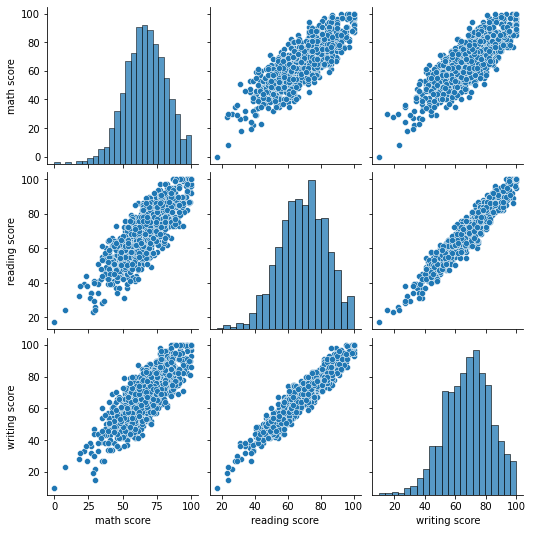

In [102]:
# plot the pairplot
sns.pairplot(student)

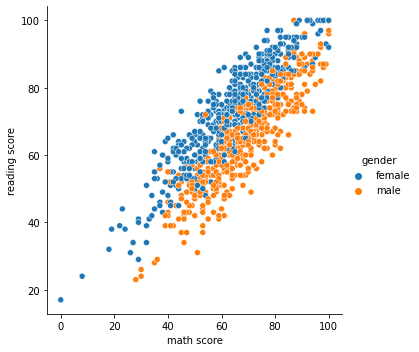

In [103]:
# Plot the scatter plot
sns.relplot(x = 'math score', y = 'reading score', hue = 'gender', data = student)

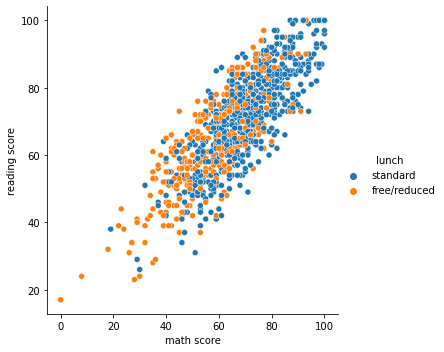

In [104]:
# plot the scatter plot
sns.relplot(x = 'math score', y = 'reading score', hue = 'lunch', data = student)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

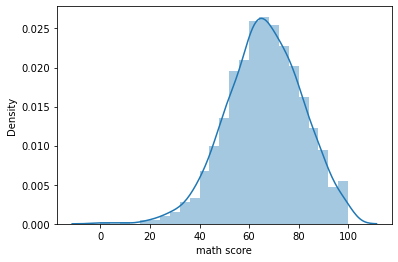

In [106]:
# Plot the histogram for the math score
sns.distplot(student['math score'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

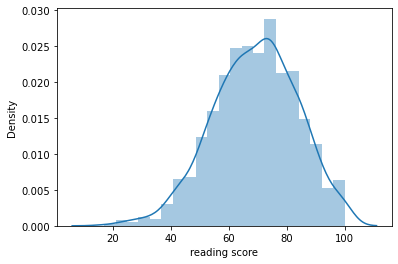

In [107]:
# Plot the histogram for the reading score
sns.distplot(student['reading score'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

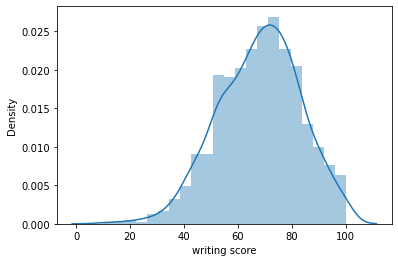

In [108]:
# Plot the histogram for the writing score
sns.distplot(student['writing score'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

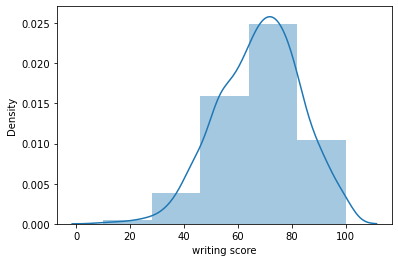

In [109]:
# Plot the histogram for the writing score including the bins
sns.distplot(student['writing score'], bins = 5)

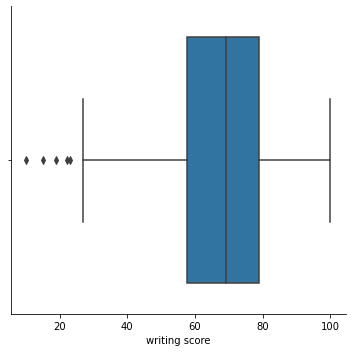

In [114]:
# Plot the boxplot for the writing score
sns.catplot(x = 'writing score', kind = 'box', data = student)

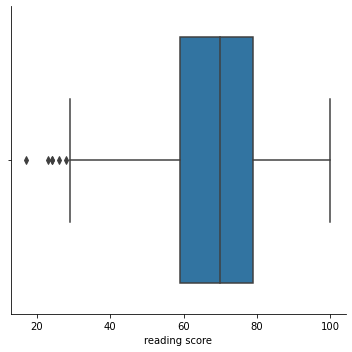

In [115]:
# Plot the boxplot for the reading score
sns.catplot(x = 'reading score', kind = 'box', data = student)

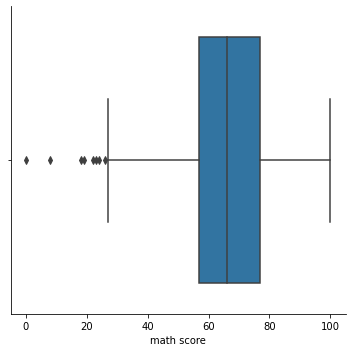

In [117]:
# Plot the boxplot for the math score
sns.catplot(x = 'math score', kind = 'box', data = student)